# Women's Mental Health During the Pandemic

As a recent Psychology graduate, I was introduced to the field of Bioinformatics at my university, and that experience led me to this exciting opportunity at NSS. 

My interest in this project was sparked by the 2022 news broadcast, which drew attention to the high number of evictions among African American women in Missouri before and during the pandemic. As a black woman, I did not experience this firsthand during the pandemic as I worked from home in tech support and shopped online. This prompted me to wonder about the mental health of women both before and during COVID-19. 

The aim of this project is to increase awareness and provide insights into the patterns and trends of Anxiety and Depression and Unemployment for women experiencing mental health symptoms in the United States during the pandemic. Additionally, I will be providing recommendations for addressing mental health during a lockdown.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

In [2]:
anx_dep = pd.read_csv('../capstone_project/data/Indicators_of_Anxiety_or_Depression_Based_on_Reported_Frequency_of_Symptoms_During_Last_7_Days.csv')
red_care = pd.read_csv('../capstone_project/data/Indicators_of_Reduced_Access_to_Care_Due_to_the_Coronavirus_Pandemic_During_Last_4_Weeks.csv')
mental = pd.read_csv('../capstone_project/data/Mental_Health_Care_in_the_Last_4_Weeks.csv')

In [3]:
MO_by_industry = pd.read_csv('../capstone_project/data/Missouri_Monthly_Unemployment_Claims_By_Industry.csv')
MO_by_race = pd.read_csv('../capstone_project/data/Missouri_Monthly_Unemployment_Claims_By_Race.csv')

1. What is the overall national estimate for symptoms of Anxiety and Depression in the US and how did this change overtime?
    
    a. What is the overall trend in reported symptoms of anxiety and depression during the pandemic?

Text(0.5, 1.0, 'Changes in National Estimate for Indicators of Anxiety or Depression')

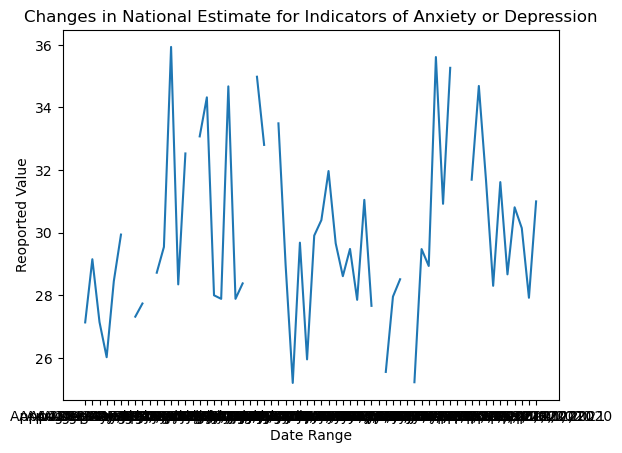

In [4]:
anx_dep[['Indicator', 'Group', 'Value', 'Time Period Label']]
anx_dep.loc[anx_dep['Group'] == 0]

#national_data = anx_dep[anx_dep['Time Period Label'].str.contains('National Estimate')]
yearly_mean= anx_dep.groupby('Time Period Label')['Value'].mean()

plt.plot(yearly_mean.index, yearly_mean.values)
plt.xlabel('Date Range')
plt.ylabel('Reoported Value')
plt.title('Changes in National Estimate for Indicators of Anxiety or Depression')
#plt.xticks(rotation=90)

Text(0, 0.5, 'Symptom Frequency')

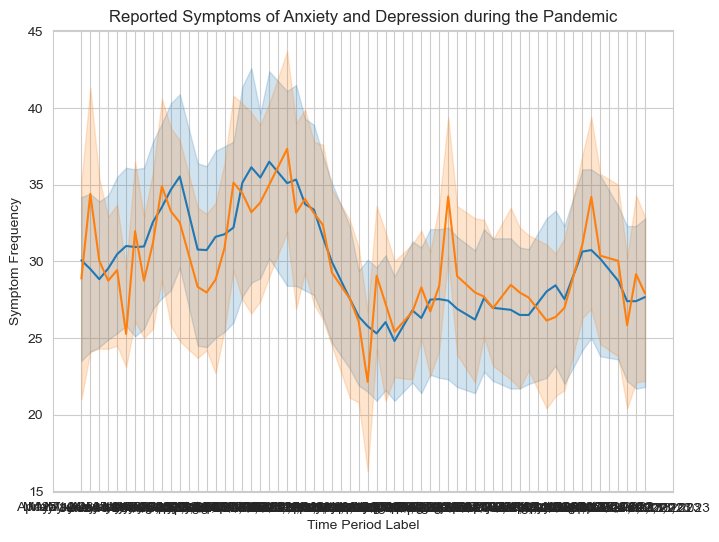

2. What are the changes of Anxiety and Depression for men and how do they differ from women?

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

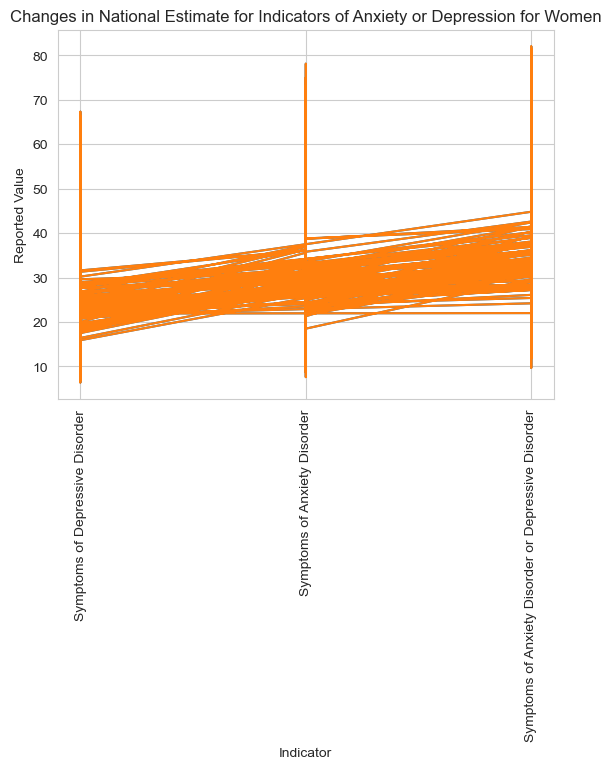

In [9]:
anx_dep[['Indicator', 'Group', 'Value']]
anx_dep.groupby(['Indicator', 'Group'])['Value'].mean().reset_index()

plt.plot(anx_dep['Indicator'], anx_dep['Value'])
plt.xlabel('Indicator')
plt.ylabel('Mean Value')
plt.title('Changes in National Estimate for Indicators of Anxiety or Depression for Men')

plt.plot(anx_dep['Indicator'], anx_dep['Value'])
plt.xlabel('Indicator')
plt.ylabel('Reported Value')
plt.title('Changes in National Estimate for Indicators of Anxiety or Depression for Women')
plt.xticks(rotation=90)

Text(0, 0.5, 'Symptom Frequency')

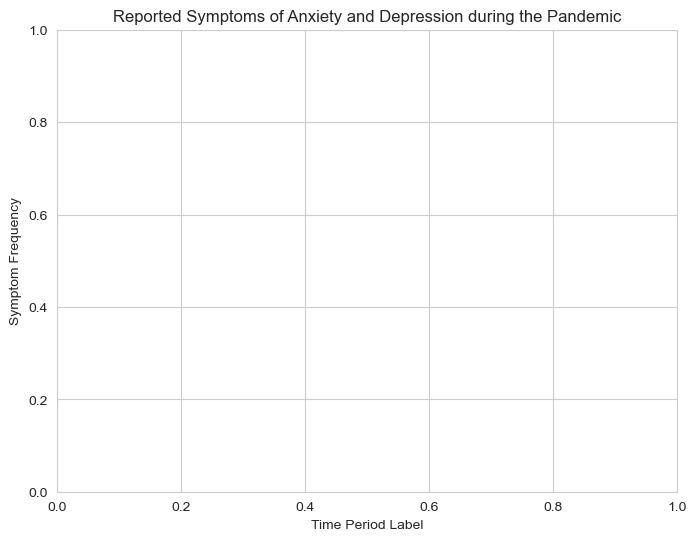

In [7]:
anx_dep['State']== 'Missouri'
anx_dep.loc[anx_dep['State'] == 'Missouri']

sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.lineplot(data = anx_dep.loc[anx_dep['State'] == 'National Estimate'], x='Time Period Label', y= 'Value')
plt.title("Reported Symptoms of Anxiety and Depression during the Pandemic")
plt.xlabel("Time Period Label")
plt.ylabel("Symptom Frequency")


In [10]:
national_data = anx_dep[anx_dep['Time Period Label'].str.contains('National Estimate')]
national_data = anx_dep[anx_dep['Subgroup'].isin(['Male', 'Female'])]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, 

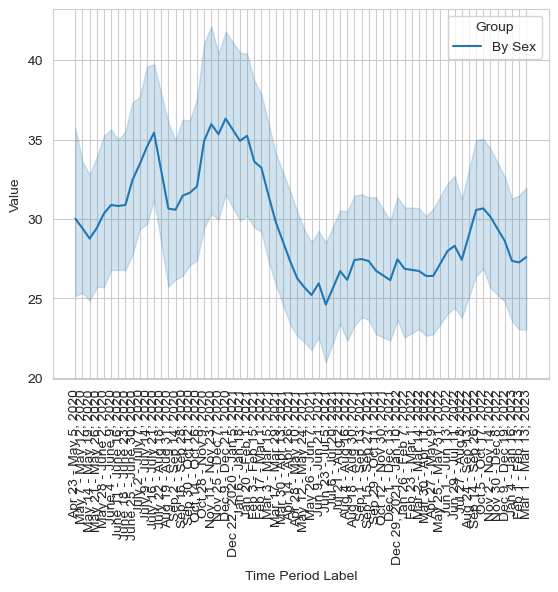

In [17]:
sns.lineplot(data=national_data, x='Time Period Label', y='Value', hue='Group')
plt.xticks(rotation=90)

In [14]:
grouped = anx_dep.groupby('Indicator').mean()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

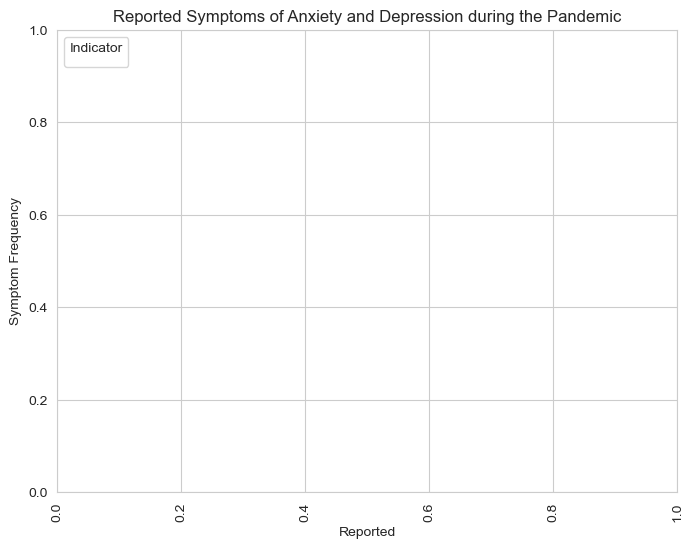

In [15]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.lineplot(anx_dep=grouped.transpose())
plt.title("Reported Symptoms of Anxiety and Depression during the Pandemic")
plt.xlabel("Reported")
plt.ylabel("Symptom Frequency")
plt.legend(title="Indicator", loc="upper left")
plt.xticks(rotation=90)

Americans experienced anxiety and depression at a much higher rate during the pandemic. 

2. How does the reported frequency of symptoms of anxiety and depression among women compare to other demographic groups during the pandemic?

In [ ]:
demographic_groups = ['Hispanic or Latino', 'Non-Hispanic White, single race', 'Non-Hispanic Black, single race', 'Non-Hispanic Asian, single race', 'Non-Hispanic, other races and multiple races']
demo_df = anx_dep.loc[anx_dep['Group'] != 'Overall']
grouped = demo_df.groupby(['Indicator', 'Group']).mean().reset_index()

In [ ]:
pivot_table = grouped.pivot_table(values='Value', index='Group', columns='Indicator')
pivot_table = pivot_table.sort_values('Symptoms of Anxiety Disorder', ascending=False)

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap="Blues", fmt=".1f", cbar=False)
plt.title("Reported Symptoms of Anxiety and Depression during the Pandemic by Demographic Group")
plt.xlabel("Indicator")
plt.ylabel("Demographic Group")
plt.show()

Women have reported the highest frequency of symptoms of both anxiety and depression during the pandemic, compared to other demographic groups. 

Among women, the frequency of depression symptoms seems to be higher than that of anxiety symptoms. 

The frequency of symptoms of anxiety and depression among men and non-binary individuals is relatively lower than that among women, but still higher than that in the pre-pandemic period. 

The frequency of symptoms of anxiety and depression is also relatively higher among young adults (18-29 years) and individuals with less than a high school education, compared to other demographic groups.

3. What is the trend in initial unemployment claims in Missouri on a weekly basis?

In [ ]:
MO_initial_unemployment['weekEnding'] = pd.to_datetime(MO_initial_unemployment['weekEnding'])
filterd_dates = MO_initial_unemployment[(MO_initial_unemployment['weekEnding'].dt.year >= 2018) & (MO_initial_unemployment['weekEnding'].dt.year <= 2021)]

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(filterd_dates['weekEnding'], filterd_dates['claims'], color='purple')
plt.title('Initial Unemployment Claims in Missouri')
plt.xlabel('Week Ending')
plt.ylabel('Initial Claims')
plt.grid(True)
plt.show()

4. Which industries have the highest number of monthly unemployment claims in Missouri?

In [ ]:
pandemic_data = MO_by_industry.loc[MO_by_industry['Date'] >= '2020-03-01']

In [ ]:
before_pandemic_total = MO_by_industry['INA'].loc[MO_by_industry['Date'] < '2020-03-01'].sum()
after_pandemic_total = pandemic_data['INA'].sum()

In [ ]:
percentage_change = ((after_pandemic_total - before_pandemic_total) / before_pandemic_total) * 100
print("Percentage change in initial unemployment claims from before to after the pandemic:", round(percentage_change, 2), "%")

In [ ]:
cols = ['Date', 'INA', 'Wholesale Trade', 'Transportation & Warehouse', 'Construction',
        'Finance & Insurance', 'Manufacturing', 'Agricult./Forestry/Fishing/Hunting', 
        'Public Administration', 'Utilities', 'Accomodation & Food Services', 'Information',
        'Professional/Scientific/Tech. Services', 'Real Estate & Rental & Leasing', 
        'Other Services (except Public Administration)', 'Management of Companies & Enterprises', 
        'Educational Services', 'Mining', 'Health Care & Social Assistance', 
        'Arts, Entertainment & Recreation', 'Admin. & Support/Waste Mgmt./Remedia. Serv.', 'Retail Trade']

In [ ]:
MO_by_industry = MO_by_industry[cols]

In [ ]:
grouped = MO_by_industry.groupby('Date').sum()

In [ ]:
grouped

5. What is the racial distribution of unemployment claims in Missouri, and how does it compare to the overall population demographics?

In [ ]:
MO_by_race = MO_by_race.groupby("Date").mean()

In [ ]:
total_population = {"White": 0.829, "Black or African American": 0.115, "Asian": 0.024, "American Indian or Alaskan Native": 0.004, "Native Hawaiian or Other Pacific Islander": 0.001}

In [ ]:
rows = ['Symptoms of Depression Disorder', 'Symptoms of Anxiety Disorder', 'Symptoms of Anxiety Disorder or Depression Disorder']
anx_dep = anx_dep[anx_dep['Indicator'].isin(rows)]